# Chapitre 3 : Recalage en imagerie médicale

Ce notebook a pour objectif de vous montrer deux exemples d'application de méthodes de recalage à l'imagerie médicale :
- Recalage intra sujet
- Recalage inter sujet

Pour pouvoir faire les exercices de ce notebook vous n'avez pas besoin d'installer de nouvelles librairies. Vous avez uniquement besoin des librairies que vous avez installées lors des séances précédentes.

Le contenu de ce notebook s'inspire du tutorial: "MICCAI 2015: An Interactive, Python-based Introduction to Registration with the Insight Toolkit (ITK)" disponible en entier sur le site: https://github.com/InsightSoftwareConsortium/SimpleITKTutorialMICCAI2015 

Par soucis de simplification, dans le cadre de cette séance, le contenu du tutorial a été raccourci et les données téléchargées. Le tout est dans le répertoire MICCAI_tutorial disponible sur votre plateforme E-learning.

Les données des exercices 3 et 4 de ce notebook proviennent du site https://www.cancerimagingarchive.net/

## Exercice1: 

Il s'agit dans ce premier exercice de faire tourner le notebook notebook_miccai_2015.ipynb en utilisant les données publiques "training_001_ct.mha" et "training_001_mr_T1.mha" disponibles dans le répertoire MICCAI_tutorial et de comprendre son fonctionnement. Ce notebook permet de recaler deux données du même sujet acquises avec deux modalités différentes: IRM et scanner. Prenez soin d'observer le positionnement des données initiales l'une par rapport à l'autre et leur positionnement final après recalage. Notez dans la cellule suivante le nom des méthodes qui ont été utilisées dans ce notebook.

- Type de transformation initiale: Euler3DTransform
- Critère de ressemblance: Mutual information
- Méthode d'interpolation:  sitkLinear
- Méthode d'optimisation: Gradient Descent

## Exercice2: 


Il s'agit dans ce deuxième exercice de s'inspirer du notebook précédent pour recaler les données de notre atelier.
Nous disposons de deux acquisitions IRM du même sujet:
- une acquisition pondérée en T1 avec un champs de vue étendu et une bonne résolution dans toutes les directions de l'espace.
- une acquisition pondérée en T2 avec un champs de vue plus réduit, une bonne résolution dans le plan axial et une large épaisseur de coupe.

1) Avec la librairie sitk lisez les deux volumes suivants: "subject1_t1.nii" et "subject1_t2.nii". L'image pondérée en T2 devrait être recalée à l'image pondérée en T1. Nous souhaitons donc transformer l'image pondéré en T2 dans le même repère que l'image pondérée en T1. Prenez bien soin de nommer votre "fixed_image" et "moving_image" en fonction.

In [77]:
import SimpleITK as sitk
import nibabel as nib
fixed_image = sitk.ReadImage('./subject1_t1.nii', sitk.sitkFloat32)
moving_image = sitk.ReadImage('./subject1_t2.nii', sitk.sitkFloat32)

2) Affichez les deux images l'une à côté de l'autre.

Question facultative: (adaptez les fonctions de visualisation de façon à tenir compte de la taille réelle des voxels)

In [78]:
fixed_array = sitk.GetArrayFromImage(fixed_image)
fixed_array2 = nib.Nifti1Image(fixed_array, np.eye(4))
resolution = fixed_array2.header.get_zooms()
window_sizeX = int(fixed_array2.shape[0] * resolution[0] / 20)
window_sizeY = int(fixed_array2.shape[1] * resolution[1] / 20)
window_sizeZ = int(fixed_array2.shape[2] * resolution[2] / 20)
print(window_sizeX, window_sizeY, window_sizeZ)

25 24 8


In [79]:
import matplotlib.pyplot as plt
from utils2 import *

# Run the ipywidgets interact() function to explore the data
interact(explore_3dimage_axial_anisotropic, \
         layer=(0, fixed_array.shape[2] - 1), \
         input_data=fixed(fixed_array), \
         figure_size = fixed((window_sizeX,window_sizeY)));

# Run the ipywidgets interact() function to explore the data
interact(explore_3dimage_coronal_anisotropic, \
         layer=(0, fixed_array.shape[1] - 1), \
         input_data=fixed(fixed_array), \
         figure_size = fixed((window_sizeX, window_sizeZ)));

# Run the ipywidgets interact() function to explore the data
interact(explore_3dimage_sagital_anisotropic, \
         layer=(0, fixed_array.shape[0] - 1), \
         input_data=fixed(fixed_array), \
         figure_size = fixed((window_sizeY, window_sizeZ)));

interactive(children=(IntSlider(value=87, description='layer', max=175), Output()), _dom_classes=('widget-inte…

interactive(children=(IntSlider(value=239, description='layer', max=479), Output()), _dom_classes=('widget-int…

interactive(children=(IntSlider(value=255, description='layer', max=511), Output()), _dom_classes=('widget-int…

In [96]:
interact(lambda image1_z, image2_z, image1, image2,:display_scalar_images(image1_z, image2_z, image1, image2, 
                                                                          title1='fixed image',
                                                                          title2 = 'moving image'),
         image1_z=(0,fixed_image.GetSize()[2]-1), 
         image2_z=(0,moving_image.GetSize()[2]-1), 
         image1 = fixed(fixed_image), 
         image2=fixed(moving_image),
         figure_size = fixed((window_sizeX,window_sizeY)));

interactive(children=(IntSlider(value=255, description='image1_z', max=511), IntSlider(value=13, description='…

In [81]:
%matplotlib inline
%run registration_utilities.py

<Figure size 432x288 with 0 Axes>

3) Appliquez une transformation initiale aux deux images pour les rapprocher et observez le résultat:

In [82]:
initial_transform = sitk.CenteredTransformInitializer(fixed_image, 
                                                      moving_image, 
                                                      sitk.Euler3DTransform(), 
                                                      sitk.CenteredTransformInitializerFilter.GEOMETRY)

display_registration_results(fixed_image, moving_image, initial_transform)
print(initial_transform)

interactive(children=(IntSlider(value=255, description='image_z', max=511), FloatSlider(value=0.5, description…

itk::simple::Transform
 Euler3DTransform (000001FA6E8A9950)
   RTTI typeinfo:   class itk::Euler3DTransform<double>
   Reference Count: 1
   Modified Time: 1084433
   Debug: Off
   Object Name: 
   Observers: 
     none
   Matrix: 
     1 0 0 
     0 1 0 
     0 0 1 
   Offset: [-0.0183996, 15.1687, 39.7573]
   Center: [-2.21585, 3.41006, -7.32454]
   Translation: [-0.0183996, 15.1687, 39.7573]
   Inverse: 
     1 0 0 
     0 1 0 
     0 0 1 
   Singular: 0
   Euler's angles: AngleX=0 AngleY=0 AngleZ=0
   m_ComputeZYX = 0



4) Recalez les deux images en utilisant la fonction sitk.ImageRegistrationMethod() et en vous inspirant du notebook du tutorial MICCAI.

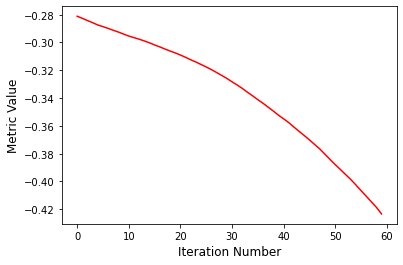

itk::simple::Transform
 CompositeTransform (000001FA6E975EF0)
   RTTI typeinfo:   class itk::CompositeTransform<double,3>
   Reference Count: 1
   Modified Time: 1958556
   Debug: Off
   Object Name: 
   Observers: 
     none
   Transforms in queue, from begin to end:
   >>>>>>>>>
   Euler3DTransform (000001FA6E8A8F00)
     RTTI typeinfo:   class itk::Euler3DTransform<double>
     Reference Count: 1
     Modified Time: 1958547
     Debug: Off
     Object Name: 
     Observers: 
       none
     Matrix: 
       0.999936 -0.000526823 -0.0113069 
       0.000776108 0.999756 0.0220541 
       0.0112925 -0.0220614 0.999693 
     Offset: [-0.632306, 3.99889, 12.3798]
     Center: [-2.21585, 3.41006, -7.32454]
     Translation: [-0.551142, 3.8348, 12.2818]
     Inverse: 
       0.999936 0.000776108 0.0112925 
       -0.000526823 0.999756 -0.0220614 
       -0.0113069 0.0220541 0.999693 
     Singular: 0
     Euler's angles: AngleX=-0.0220632 AngleY=-0.0112955 AngleZ=0.000526952
     m_Compute

In [83]:
registration_method = sitk.ImageRegistrationMethod()

registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)
registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
registration_method.SetMetricSamplingPercentage(0.01)

registration_method.SetInterpolator(sitk.sitkLinear)

registration_method.SetOptimizerAsGradientDescent(learningRate=1.0, numberOfIterations=60)
registration_method.SetOptimizerScalesFromPhysicalShift() 

registration_method.SetInitialTransform(initial_transform, inPlace=False)

registration_method.AddCommand(sitk.sitkStartEvent, metric_start_plot)
registration_method.AddCommand(sitk.sitkEndEvent, metric_end_plot)
registration_method.AddCommand(sitk.sitkIterationEvent, 
                               lambda: metric_plot_values(registration_method))

final_transform_v1 = registration_method.Execute(fixed_image, moving_image)

print(final_transform_v1)

5) Affichez la superposition entre l'image fixe et l'image recalée.

In [84]:
display_registration_results(fixed_image, moving_image, final_transform_v1)
print('Final metric value: {0}'.format(registration_method.GetMetricValue()))
print('Optimizer\'s stopping condition, {0}'.format(registration_method.GetOptimizerStopConditionDescription()))

interactive(children=(IntSlider(value=255, description='image_z', max=511), FloatSlider(value=0.5, description…

Final metric value: -0.4233193449645763
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Maximum number of iterations (60) exceeded.


6) Sauvegardez l'image recalée sous le nom: "subject1_t2_registered.nii"

In [85]:
import os
# Resample the moving image onto the fixed image's grid.
moving_resampled = sitk.Resample(moving_image, fixed_image, final_transform_v1, sitk.sitkLinear, 
                                 0.0, moving_image.GetPixelIDValue())    
sitk.WriteImage(moving_resampled, os.path.join('./', 'moving_transformed.mha'))
sitk.WriteTransform(final_transform_v1, os.path.join('./', 'final_transform_v1.1.tfm'))
Registered_image = sitk.Cast(moving_image, sitk.sitkInt16)
sitk.WriteImage(Registered_image, "./subject1_t2_registered.nii")

7) Affichez le résultat du recalage cette fois-ci en vue sagittale. Que remarquez vous? Que faut il faire?

In [86]:
from utils import explore_3dimage_sagital

nii_volume = nib.load('./subject1_t2_registered.nii')
volume_array = nii_volume.get_fdata()
interact(explore_3dimage_sagital, layer=(0, volume_array.shape[0] - 1),input_data=fixed(volume_array)); 
#Remarque : l'affichage est incorrect il faudrait modifier les fonctions d'affichage comme fait auparavant

interactive(children=(IntSlider(value=107, description='layer', max=215), Output()), _dom_classes=('widget-int…

 ## Exercice3: 

1) Appliquez le même code précédent pour recaler les deux images suivantes "subject2_time1.nii" et "subject2_time2.nii". Ces deux images proviennent du même sujet et de la même modalité mais acquises à des dates différentes. Que remarquez vous?

In [87]:
#Initial transform
fixed_image1 = sitk.ReadImage('./subject2_time1.nii', sitk.sitkFloat32)
moving_image1 = sitk.ReadImage('./subject2_time2.nii', sitk.sitkFloat32)
initial_transform1 = sitk.CenteredTransformInitializer(fixed_image1, 
                                                      moving_image1, 
                                                      sitk.Euler3DTransform(), 
                                                      sitk.CenteredTransformInitializerFilter.GEOMETRY)

display_registration_results(fixed_image1, moving_image1, initial_transform1)
print(initial_transform1)

interactive(children=(IntSlider(value=11, description='image_z', max=23), FloatSlider(value=0.5, description='…

itk::simple::Transform
 Euler3DTransform (000001FA6E8ABC60)
   RTTI typeinfo:   class itk::Euler3DTransform<double>
   Reference Count: 1
   Modified Time: 1959857
   Debug: Off
   Object Name: 
   Observers: 
     none
   Matrix: 
     1 0 0 
     0 1 0 
     0 0 1 
   Offset: [-1.32629, -3.39202, 15.2622]
   Center: [0.93082, 5.58923, -0.56908]
   Translation: [-1.32629, -3.39202, 15.2622]
   Inverse: 
     1 0 0 
     0 1 0 
     0 0 1 
   Singular: 0
   Euler's angles: AngleX=0 AngleY=0 AngleZ=0
   m_ComputeZYX = 0



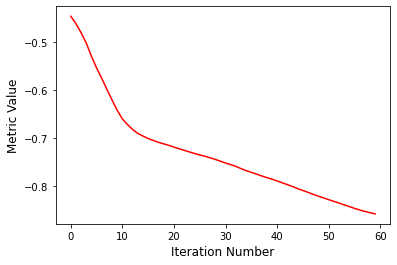

itk::simple::Transform
 CompositeTransform (000001FA6E974460)
   RTTI typeinfo:   class itk::CompositeTransform<double,3>
   Reference Count: 1
   Modified Time: 2008840
   Debug: Off
   Object Name: 
   Observers: 
     none
   Transforms in queue, from begin to end:
   >>>>>>>>>
   Euler3DTransform (000001FA6E8A82A0)
     RTTI typeinfo:   class itk::Euler3DTransform<double>
     Reference Count: 1
     Modified Time: 2008831
     Debug: Off
     Object Name: 
     Observers: 
       none
     Matrix: 
       0.999217 0.0356373 0.0171614 
       -0.0346682 0.99795 -0.053793 
       -0.0190432 0.0531559 0.998405 
     Offset: [-2.78676, 0.524619, 7.67732]
     Center: [0.93082, 5.58923, -0.56908]
     Translation: [-2.59807, 0.511505, 7.9576]
     Inverse: 
       0.999217 -0.0346682 -0.0190432 
       0.0356373 0.99795 0.0531559 
       0.0171614 -0.053793 0.998405 
     Singular: 0
     Euler's angles: AngleX=0.053181 AngleY=0.0190714 AngleZ=-0.0356953
     m_ComputeZYX = 0
   End of

In [88]:
#Final transform
registration_method = sitk.ImageRegistrationMethod()

registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)
registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
registration_method.SetMetricSamplingPercentage(0.01)

registration_method.SetInterpolator(sitk.sitkLinear)

registration_method.SetOptimizerAsGradientDescent(learningRate=1.0, numberOfIterations=60)
registration_method.SetOptimizerScalesFromPhysicalShift() 

registration_method.SetInitialTransform(initial_transform1, inPlace=False)

registration_method.AddCommand(sitk.sitkStartEvent, metric_start_plot)
registration_method.AddCommand(sitk.sitkEndEvent, metric_end_plot)
registration_method.AddCommand(sitk.sitkIterationEvent, 
                               lambda: metric_plot_values(registration_method))

final_transform_v2 = registration_method.Execute(fixed_image1, moving_image1)

print(final_transform_v2)

Remarque : Il paraît que l'erreur a diminué par rapport au sujet 1 puisque les deux images acquises à des délais différents ont la même modalité

2) Enregistrez l'image recalée sous le nom "subject2_time2_registered.nii".

In [89]:
# Resample the moving image onto the fixed image's grid.
moving_resampled1 = sitk.Resample(moving_image1, fixed_image1, final_transform_v2, sitk.sitkLinear, 
                                 0.0, moving_image1.GetPixelIDValue())    
sitk.WriteImage(moving_resampled1, os.path.join('./', 'moving_transformed1.mha'))
sitk.WriteTransform(final_transform_v2, os.path.join('./', 'final_transform_v2.1.tfm'))
Registered_image1 = sitk.Cast(moving_image1, sitk.sitkInt16)
sitk.WriteImage(Registered_image1, "./subject2_time2_registered.nii")

## Exercice4: (Bonus facultatif) 

1) Recalez les images "subject2_time1.nii" et "subject3_time1.nii". Précisez le type de transformation à appliquer.

In [90]:
#Initial transform
fixed_image2 = sitk.ReadImage('./subject2_time1.nii', sitk.sitkFloat32)
moving_image2 = sitk.ReadImage('./subject3_time1.nii', sitk.sitkFloat32)
initial_transform2 = sitk.CenteredTransformInitializer(fixed_image2, 
                                                      moving_image2, 
                                                      sitk.Euler3DTransform(), 
                                                      sitk.CenteredTransformInitializerFilter.GEOMETRY)

display_registration_results(fixed_image2, moving_image2, initial_transform2)
print(initial_transform2)

interactive(children=(IntSlider(value=11, description='image_z', max=23), FloatSlider(value=0.5, description='…

itk::simple::Transform
 Euler3DTransform (000001FA6E8AB420)
   RTTI typeinfo:   class itk::Euler3DTransform<double>
   Reference Count: 1
   Modified Time: 2009778
   Debug: Off
   Object Name: 
   Observers: 
     none
   Matrix: 
     1 0 0 
     0 1 0 
     0 0 1 
   Offset: [-4.89747, -53.0962, -17.0379]
   Center: [0.93082, 5.58923, -0.56908]
   Translation: [-4.89747, -53.0962, -17.0379]
   Inverse: 
     1 0 0 
     0 1 0 
     0 0 1 
   Singular: 0
   Euler's angles: AngleX=0 AngleY=0 AngleZ=0
   m_ComputeZYX = 0



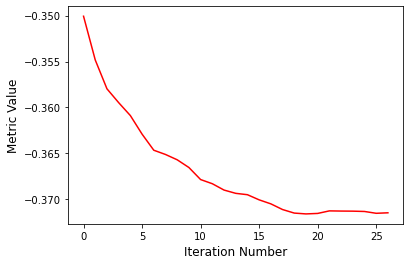

itk::simple::Transform
 CompositeTransform (000001FA6E9750E0)
   RTTI typeinfo:   class itk::CompositeTransform<double,3>
   Reference Count: 1
   Modified Time: 2053831
   Debug: Off
   Object Name: 
   Observers: 
     none
   Transforms in queue, from begin to end:
   >>>>>>>>>
   Euler3DTransform (000001FA6E8A9110)
     RTTI typeinfo:   class itk::Euler3DTransform<double>
     Reference Count: 1
     Modified Time: 2053672
     Debug: Off
     Object Name: 
     Observers: 
       none
     Matrix: 
       0.999934 0.00318889 0.01105 
       -0.00296248 0.999787 -0.0204459 
       -0.0111128 0.0204118 0.99973 
     Offset: [-8.49503, -52.5127, -18.4704]
     Center: [0.93082, 5.58923, -0.56908]
     Translation: [-8.48356, -52.505, -18.3665]
     Inverse: 
       0.999934 -0.00296248 -0.0111128 
       0.00318889 0.999787 0.0204118 
       0.01105 -0.0204459 0.99973 
     Singular: 0
     Euler's angles: AngleX=0.0204132 AngleY=0.0111154 AngleZ=-0.00318956
     m_ComputeZYX = 0
   

In [91]:
#Final transform
registration_method = sitk.ImageRegistrationMethod()

registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)
registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
registration_method.SetMetricSamplingPercentage(0.01)

registration_method.SetInterpolator(sitk.sitkLinear)

registration_method.SetOptimizerAsGradientDescent(learningRate=1.0, numberOfIterations=60)
registration_method.SetOptimizerScalesFromPhysicalShift() 

registration_method.SetInitialTransform(initial_transform2, inPlace=False)

registration_method.AddCommand(sitk.sitkStartEvent, metric_start_plot)
registration_method.AddCommand(sitk.sitkEndEvent, metric_end_plot)
registration_method.AddCommand(sitk.sitkIterationEvent, 
                               lambda: metric_plot_values(registration_method))

final_transform_v3 = registration_method.Execute(fixed_image2, moving_image2)

print(final_transform_v3)

Remarque : La transformation réalisée est le Composite Transform